In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
 reviews = [
        "This product is amazing! I love it!",
        "Not satisfied with the quality. It broke after a few days.",
        "Fast shipping and excellent customer service!",
        "The product exceeded my expectations."
    ]

In [3]:
df = pd.DataFrame({'Review': reviews})

In [4]:
df

,Review
0,This product is amazing! I love it!
1,Not satisfied with the quality. It broke after...
2,Fast shipping and excellent customer service!
3,The product exceeded my expectations.


In [5]:
df['Cleaned_Review'] = df['Review'].str.lower()
df['Cleaned_Review'] = df['Cleaned_Review'].str.replace('[^\w\s]', '')

C:\Users\Rathnavel\AppData\Local\Temp\ipykernel_23500\2237659766.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned_Review'] = df['Cleaned_Review'].str.replace('[^\w\s]', '')


In [6]:
df.head()

,Review,Cleaned_Review
0,This product is amazing! I love it!,this product is amazing i love it
1,Not satisfied with the quality. It broke after...,not satisfied with the quality it broke after ...
2,Fast shipping and excellent customer service!,fast shipping and excellent customer service
3,The product exceeded my expectations.,the product exceeded my expectations


In [7]:
stop_words = set(stopwords.words('english'))
df['Tokenized_Review'] = df['Cleaned_Review'].apply(word_tokenize)
df['Tokenized_Review'] = df['Tokenized_Review'].apply(lambda x: [word for word in x if word.isalnum() and word not in stop_words])

In [8]:
df

,Review,Cleaned_Review,Tokenized_Review
0,This product is amazing! I love it!,this product is amazing i love it,"[product, amazing, love]"
1,Not satisfied with the quality. It broke after...,not satisfied with the quality it broke after ...,"[satisfied, quality, broke, days]"
2,Fast shipping and excellent customer service!,fast shipping and excellent customer service,"[fast, shipping, excellent, customer, service]"
3,The product exceeded my expectations.,the product exceeded my expectations,"[product, exceeded, expectations]"


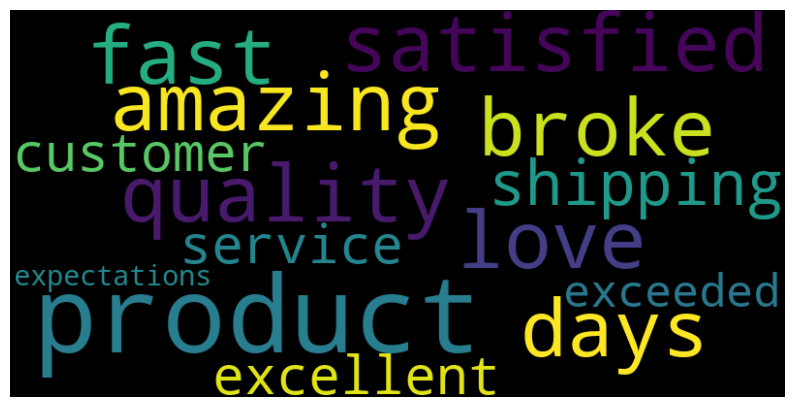

In [9]:
all_words = ' '.join(df['Cleaned_Review'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [11]:
sia = SentimentIntensityAnalyzer()
df['Emotion Score'] = df['Cleaned_Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [12]:
df['Emotion'] = df['Emotion Score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

In [13]:
df

,Review,Cleaned_Review,Tokenized_Review,Emotion Score,Emotion
0,This product is amazing! I love it!,this product is amazing i love it,"[product, amazing, love]",0.8402,Positive
1,Not satisfied with the quality. It broke after...,not satisfied with the quality it broke after ...,"[satisfied, quality, broke, days]",-0.6288,Negative
2,Fast shipping and excellent customer service!,fast shipping and excellent customer service,"[fast, shipping, excellent, customer, service]",0.5719,Positive
3,The product exceeded my expectations.,the product exceeded my expectations,"[product, exceeded, expectations]",0.0000,Neutral


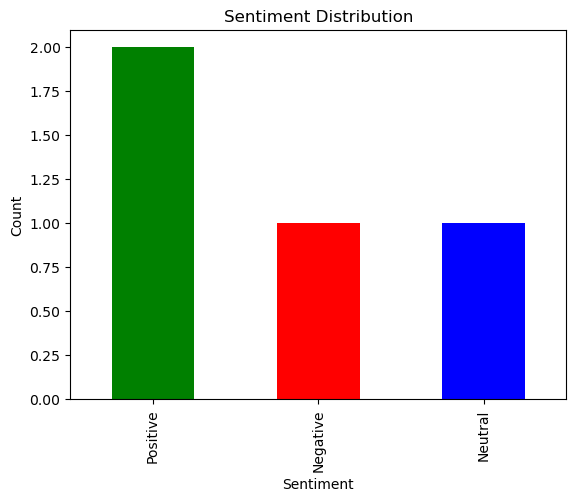

In [14]:
sentiment_counts = df['Emotion'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()